# Восстановление золота из руды

---


```
Технологический процесс
Как золото получают из руды? Изучите внимательно стадии процесса.
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. 
Её отправляют на флотацию (обогащение) и двухэтапную очистку.
```
![avatar](https://pictures.s3.yandex.net/resources/viruchka_1576238830.jpg)
```
Опишем каждую стадию:
1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. 
После обогащения получается черновой концентрат и «отвальные хвосты», 
то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное 
физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка
Черновой концентрат проходит две очистки. 
На выходе получается финальный концентрат и новые отвальные хвосты.

Описание данных
Технологический процесс
Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate **— ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота

Параметры этапов
air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи

Наименование признаков
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag
Возможные значения для блока [этап]:
rougher — флотация
primary_cleaner — первичная очистка
secondary_cleaner — вторичная очистка
final — финальные характеристики
Возможные значения для блока [тип_параметра]:
input — параметры сырья
output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики

Расчёт эффективности
Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.
Эффективность обогащения рассчитывается по формуле:
```
$\large Recovery = \frac{C\times(F-T)}{F\times(C-T)} \times 100\% $
```
где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. 
Причём важен не только финальный продукт, но и черновой концентрат.

Метрика качества:

Для решения задачи введём новую метрику качества — sMAPE 
(англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. 
Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.
Метрика sMAPE вычисляется так:
```
$\large sMAPE = \frac{1}{N} \sum_{i=1}^{N} \frac{| y_i - \hat{y}_i |}{( | y_i | + |\hat{y}_i | ) / 2} \times 100\% $
```
Обозначения:
```
$\large y_i$  -Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

$\large \hat{y}_i$  -Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

$\large N$  -Количество объектов в выборке.

$\large \sum_{i=1}^{N}$  -Суммирование по всем объектам выборки (i меняется от 1 до N).
```
Нужно спрогнозировать сразу две величины:
эффективность обогащения чернового концентрата rougher.output.recovery;
эффективность обогащения финального концентрата final.output.recovery.
Итоговая метрика складывается из двух величин:
```
$\large Итоговое\ sMAPE = 25\% \times sMAPE( rougher ) + 75\% \times sMAPE ( final ) $


----
----
___Описание проекта:___

```
Данные находятся в трёх файлах:
gold_recovery_train_new.csv — обучающая выборка;
gold_recovery_test_new.csv — тестовая выборка;
gold_recovery_full_new.csv — исходные данные.
Данные индексируются датой и временем получения информации (признак date). 
Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. 
Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. 
Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. 
Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

Инструкция по выполнению проекта:

1. Подготовьте данные
1.1. Откройте файлы и изучите их.
Путь к файлам:
/datasets/gold_recovery_train_new.csv
/datasets/gold_recovery_test_new.csv
/datasets/gold_recovery_full_new.csv
1.2. Проверьте, что эффективность обогащения рассчитана правильно. 
     Вычислите её на обучающей выборке для признака rougher.output.recovery. 
     Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
1.3. Проанализируйте признаки, недоступные в тестовой выборке. 
     Что это за параметры? К какому типу относятся?
1.4. Проведите предобработку данных.

2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. 
     Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией. 
     Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
```

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-файлов" data-toc-modified-id="Открытие-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файлов</a></span></li><li><span><a href="#Проверка-правильности-расчета-эффективности-обогащения-на-обучающей-выборке-для-признака-rougher.output.recovery.-Нахождение-MAE-между-расчётами-и-значением-признака." data-toc-modified-id="Проверка-правильности-расчета-эффективности-обогащения-на-обучающей-выборке-для-признака-rougher.output.recovery.-Нахождение-MAE-между-расчётами-и-значением-признака.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности расчета эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Нахождение MAE между расчётами и значением признака.</a></span></li><li><span><a href="#Анализ-признаков,-недоступные-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-Выбор-лучшей-модели-и-проверка-её-на-тестовой-выборке." data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-Выбор-лучшей-модели-и-проверка-её-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества кросс-валидацией. Выбор лучшей модели и проверка её на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler


### Открытие файлов

In [2]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv',index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_cleaner.i

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_cleaner.i

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                         529

### Проверка правильности расчета эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Нахождение MAE между расчётами и значением признака.

$\large Recovery = \frac{C\times(F-T)}{F\times(C-T)} \times 100\% $

In [6]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
df_train['rougher.output.recovery_calculated'] = (C * (F - T)) / (F * (C - T)) * 100
mae = (df_train['rougher.output.recovery_calculated'] - 
       df_train['rougher.output.recovery']).abs().sum() / len(df_train)
print("MAE", ":", mae)

MAE : 9.682896147825551e-15


__Вывод:  значения расчитаны верно.__

### Анализ признаков, недоступные в тестовой выборке

In [7]:
unavailable_columns = list(df_full.columns.difference(df_test.columns))
print('Недоступно', len(unavailable_columns), 'столбца:')
unavailable_columns

Недоступно 34 столбца:


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

__Отсутствующие столбцы содержат параметры продукта и расчетные характеристики,   
которые замеряются и/или расчитываются позже, т.е модель не может их использовать для предсказаний.  
Также отсутствуют целевые признаки, которые потребуются для оценки качества моделей.__   

---

### Предобработка данных

Выделим данные для обучения моделей

In [8]:
X_columns = list(df_full.columns.difference(unavailable_columns))
y_columns = ['rougher.output.recovery', 'final.output.recovery']
ml_full = df_full.loc[:, X_columns + y_columns]  

Процент пропусков данных:

In [9]:
(ml_full.isna().mean() * 100).sort_values(ascending=False)

rougher.input.floatbank11_xanthate            2.330367
rougher.state.floatbank10_e_air               2.242914
secondary_cleaner.state.floatbank2_a_air      1.131745
rougher.input.feed_size                       0.745923
primary_cleaner.input.xanthate                0.535007
rougher.input.feed_pb                         0.514430
rougher.input.feed_sol                        0.509285
rougher.input.floatbank11_sulfate             0.226349
primary_cleaner.input.depressant              0.190339
rougher.input.floatbank10_sulfate             0.174906
primary_cleaner.input.sulfate                 0.123463
secondary_cleaner.state.floatbank2_b_air      0.118319
secondary_cleaner.state.floatbank3_a_air      0.066876
rougher.input.feed_rate                       0.056587
rougher.input.floatbank10_xanthate            0.041154
secondary_cleaner.state.floatbank4_a_air      0.030866
primary_cleaner.state.floatbank8_b_air        0.020577
primary_cleaner.state.floatbank8_a_air        0.020577
primary_cl

Отдельные параметры имеют не много пропусков, но они слабо пересекаются, и поэтому  

In [10]:
print('Удаление строк, содержащих пропуски вызовет удаление',
      round((len(ml_full) - len(ml_full.dropna())) / len(ml_full) * 100, 2), 
      '% строк исходного датасета')

Удаление строк, содержащих пропуски вызовет удаление 7.88 % строк исходного датасета


Из задания известно, что соседние по времени параметры похожи,  
поэтому заполним пропуски последними известными значениями: 

In [11]:
ml_full = ml_full.ffill()
ml_full.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.depressant,19439.0,8.8,3.3,0.0,6.1,8.0,11.0,40.0
primary_cleaner.input.feed_size,19439.0,7.3,0.6,1.1,6.9,7.3,7.7,15.5
primary_cleaner.input.sulfate,19439.0,144.5,44.6,0.0,114.1,143.2,175.0,266.0
primary_cleaner.input.xanthate,19439.0,1.0,0.5,0.0,0.7,0.9,1.2,4.1
primary_cleaner.state.floatbank8_a_air,19439.0,1589.4,129.0,0.0,1505.1,1600.6,1697.7,2103.1
primary_cleaner.state.floatbank8_a_level,19439.0,-491.2,32.4,-798.6,-500.3,-499.9,-499.4,-57.2
primary_cleaner.state.floatbank8_b_air,19439.0,1591.4,131.8,0.0,1503.6,1600.5,1699.2,2114.9
primary_cleaner.state.floatbank8_b_level,19439.0,-492.2,33.8,-800.0,-500.4,-500.0,-499.4,-142.5
primary_cleaner.state.floatbank8_c_air,19439.0,1586.7,136.1,0.0,1500.9,1600.3,1699.5,2013.2
primary_cleaner.state.floatbank8_c_level,19439.0,-492.0,32.7,-800.0,-500.7,-499.9,-498.9,-150.9


Сформируем тренировочную и тестовую выборки:

In [12]:
X_train = ml_full.loc[df_train.index, X_columns].reset_index().drop('date', axis=1)
y_train = ml_full.loc[df_train.index, y_columns].reset_index().drop('date', axis=1)
X_test = ml_full.loc[df_test.index, X_columns].reset_index().drop('date', axis=1)
y_test = ml_full.loc[df_test.index, y_columns].reset_index().drop('date', axis=1)
print('Тренировочная выборка:\t', X_train.shape, '\t' ,y_train.shape)
print('Тестовая выборка:\t', X_test.shape, '\t', y_test.shape)

Тренировочная выборка:	 (14149, 52) 	 (14149, 2)
Тестовая выборка:	 (5290, 52) 	 (5290, 2)


## Анализ данных

###  Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.


Есть информация о концентрации в трех точках:  
- после флотации
- после первого этапа очистки
- после второго этапа очистки (финальная)

In [13]:
for s in df_full.columns:
    if 'concentrate_' in s:
        print(s)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au


In [14]:
au_conc = df_full[['rougher.output.concentrate_au', 
                   'primary_cleaner.output.concentrate_au', 
                   'final.output.concentrate_au']].dropna()

ag_conc = df_full[['rougher.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_ag', 
                   'final.output.concentrate_ag']].dropna()

pb_conc = df_full[['rougher.output.concentrate_pb', 
                   'primary_cleaner.output.concentrate_pb', 
                   'final.output.concentrate_pb']].dropna()

cols = ['после флотации', 
        'после первичной очистки', 
        'концентрация на выходе']

au_conc.columns = cols
ag_conc.columns = cols
pb_conc.columns = cols

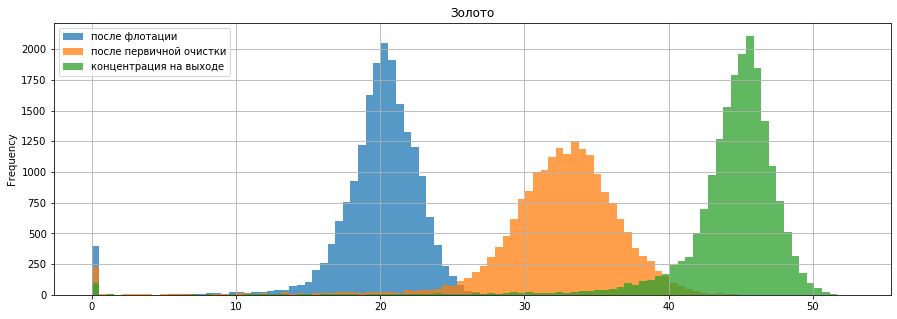

In [15]:
ax = au_conc.plot(kind='hist', bins=100, figsize=(15, 5), grid=True, alpha=0.75, title='Золото')

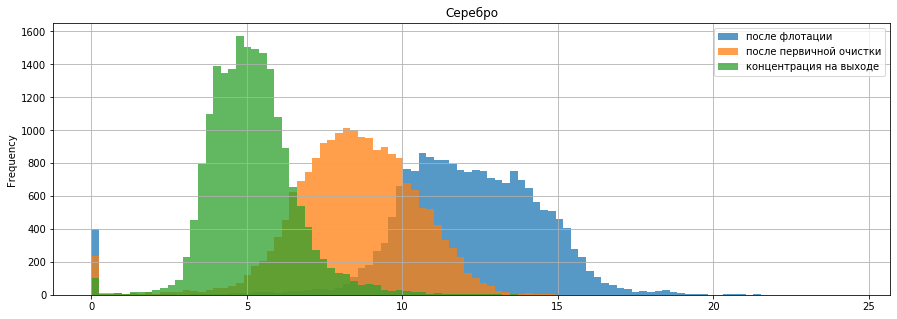

In [16]:
ax = ag_conc.plot(kind='hist', bins=100, figsize=(15, 5), grid=True, alpha=0.75, title='Серебро')

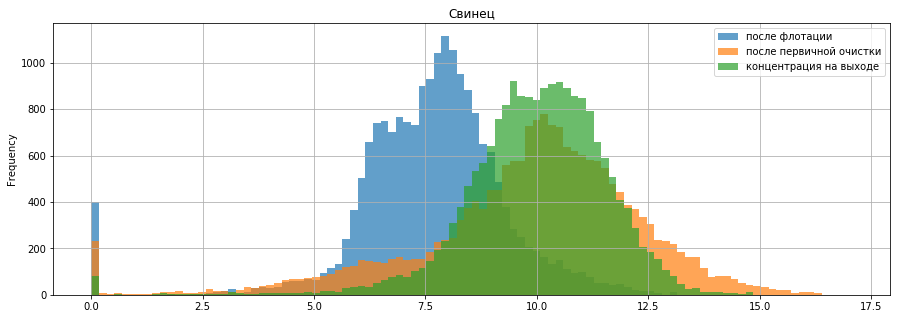

In [17]:
ax = pb_conc.plot(kind='hist', bins=100, figsize=(15, 5), grid=True, alpha=0.7, title='Свинец')

___Концентрация серебра уменьшается по ходу переработки в отличие от золота и свинца.   
Концентрация свинца увеличивается незначительно; Лучше всего очищается золото.___

###  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.


Данные о размере гранул сырья есть на входе на флотацию и на входе на первичную очистку:

In [18]:
for s in df_full.columns:
    if 'size' in s:
        print(s)

primary_cleaner.input.feed_size
rougher.input.feed_size


In [19]:
df_train[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].dropna().describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,14005.000000,14005.000000
mean,60.110518,7.314827
std,22.418485,0.608746
min,9.659576,1.080000
25%,48.973027,6.960000
50%,55.373885,7.290000
75%,66.080172,7.685000
max,484.967466,10.470000


In [20]:
df_test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].dropna().describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5289.000000,5289.000000
mean,55.951097,7.266352
std,19.081758,0.610276
min,0.046369,5.650000
25%,43.906347,6.890000
50%,50.841029,7.250000
75%,62.431047,7.600000
max,392.494040,15.500000


___Размеры гранул имеют схожее распределение___

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [21]:
joined_conc = au_conc.join(ag_conc, rsuffix='_ag').join(pb_conc, rsuffix='_pb').dropna()

In [22]:
total_conc = pd.DataFrame()
total_conc['после флотации'] = joined_conc.apply(lambda x: x[0]+x[3]+x[6], axis=1)
total_conc['после первичной очистки'] = joined_conc.apply(lambda x: x[1]+x[4]+x[7], axis=1)
total_conc['концентрация на выходе'] = joined_conc.apply(lambda x: x[2]+x[5]+x[8], axis=1)

In [23]:
epsilon = np.finfo(float).eps

In [24]:
incorrect_data = ((total_conc['после флотации'] < epsilon) |
                  (total_conc['после первичной очистки'] < epsilon) |
                  (total_conc['концентрация на выходе'] < epsilon)
                 )
print('Количество строк с нулевой суммарной концентрацией:', 
      incorrect_data.sum(), '(' +  
      str(round(incorrect_data.mean()*100, 2))+ '%)')

Количество строк с нулевой суммарной концентрацией: 573 (2.97%)


In [25]:
total_conc[incorrect_data].sample(6, random_state=2)

,после флотации,после первичной очистки,концентрация на выходе
date,,,
2017-04-15 07:59:59,38.607797,0.000000,59.944693
2016-11-19 15:59:59,18.436502,29.160158,0.000000
2016-09-06 22:59:59,0.000000,55.549037,60.711115
2017-06-06 22:59:59,0.000000,55.049246,61.072263
2017-06-04 16:59:59,0.000000,55.537905,61.715938
2017-08-12 00:59:59,34.327270,0.000000,58.026877


In [26]:
total_conc.drop(total_conc[incorrect_data].index, inplace=True)

In [27]:
total_conc.describe()

,после флотации,после первичной очистки,концентрация на выходе
count,18749.000000,18749.000000,18749.000000
mean,40.196786,50.665529,59.585523
std,3.872232,6.570297,4.120569
min,0.030000,0.030000,0.030000
25%,38.535909,50.105544,59.321258
50%,40.370417,51.911374,60.306795
75%,42.403399,53.359157,61.090348
max,49.700943,60.106566,64.968881


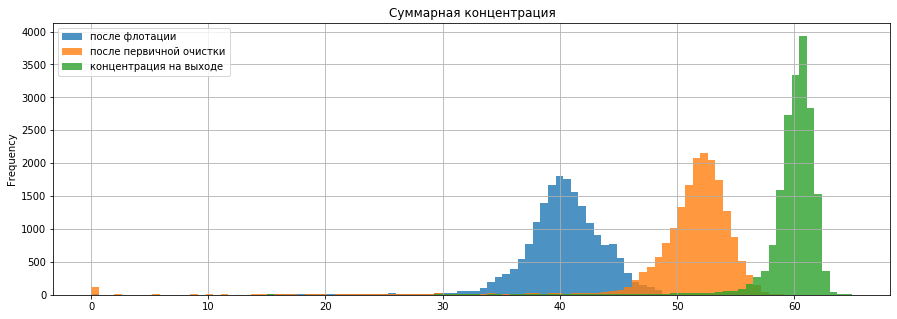

In [28]:
ax = total_conc.plot(kind='hist', bins=100, figsize=(15, 5), grid=True, alpha=0.8, title='Суммарная концентрация')

## Модель

### Функция для вычисления итоговой sMAPE.


$\large Итоговое\ sMAPE = 25\% \times sMAPE( rougher ) + 75\% \times sMAPE ( final ) $


In [29]:
def total_smape(target, predic):
    
    target = np.array(target)
    target_rougher = target[:, 0]
    predic_rougher = predic[:, 0]

    num = np.abs(target_rougher - predic_rougher)
    den = (np.abs(target_rougher) + np.abs(predic_rougher)) / 2
    smape_rougher = np.mean(num / den) * 100

    target_final = target[:, 1]
    predic_final = predic[:, 1]

    num = np.abs(target_final - predic_final)
    den = (np.abs(target_final) + np.abs(predic_final)) / 2
    smape_final = np.mean(num / den) * 100

    return (smape_rougher * 0.25 + smape_final * 0.75)


In [30]:
scorer = make_scorer(total_smape, greater_is_better=False)

###  Обучение разных моделей и оценка их качества кросс-валидацией. Выбор лучшей модели и проверка её на тестовой выборке.

Отнормируем входные признаки:

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
def report(score):
    print('Среднее значение:', round(score.mean(), 2), 
          'минимум:', round(score.min(), 2), 
          'максимум:', round(score.max(), 2),
          'ст. отклонение:', round(score.std(), 2))
    print('--------------------------------------------------------------------------')

***Линейная регрессия:***

In [33]:
model = LinearRegression()
score = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
report(score)

Среднее значение: -12.38 минимум: -14.4 максимум: -9.99 ст. отклонение: 1.52
--------------------------------------------------------------------------


***Случайный лес:***

In [34]:
model = RandomForestRegressor(max_depth = 2, n_estimators = 40, random_state = 12345)
score = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
report(score)

Среднее значение: -11.04 минимум: -12.72 максимум: -8.57 ст. отклонение: 1.57
--------------------------------------------------------------------------


***Дерево решений:***

In [35]:
model = DecisionTreeRegressor(max_depth = 5, random_state = 12345)
score = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
report(score)

Среднее значение: -10.87 минимум: -12.47 максимум: -9.46 ст. отклонение: 1.08
--------------------------------------------------------------------------


***Предсказание в виде константы (среднее значение цели):***

In [36]:
model = DummyRegressor()
score = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
report(score)

Среднее значение: -11.57 минимум: -13.73 максимум: -10.0 ст. отклонение: 1.23
--------------------------------------------------------------------------


**На тестовой выборке:**

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
total_smape(y_test, prediction)

9.972775555351223

In [38]:
model = RandomForestRegressor(max_depth = 2, n_estimators = 40, random_state = 12345)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
total_smape(y_test, prediction)

8.782624868843069

In [39]:
model = DecisionTreeRegressor(max_depth = 5, random_state = 12345)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
total_smape(y_test, prediction)

9.53956632407638

In [40]:
model = DummyRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
total_smape(y_test, prediction)

10.289630376021034

## Общий вывод:

<div class="alert alert-block alert-info">
На тестовой выборке все модели показали результат чуть лучше, чем предсказание среднего значения.
    
---    
    
На тренировочной выборке лучший результат показала модель DecisionTreeRegressor(max_depth = 5)  

На тестовой выборке RandomForestRegressor(max_depth = 2, n_estimators = 40) превзошла ее,  
но эта модель имеет наибольший разброс качества предсказаний, 
    
поэтому целесообразнее использовать <b> DecisionTreeRegressor(max_depth = 5) </b>
</div>